In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [45]:
# 1. Analyze historical equipment sensor data

In [46]:
csv_content = """timestamp,sensor_1,sensor_2,failure
2023-01-01 00:00:00,49.67,102.00,0
2023-01-01 01:00:00,50.23,98.45,0
2023-01-01 02:00:00,54.12,110.34,0
2023-01-01 03:00:00,56.78,116.50,1
2023-01-01 04:00:00,48.90,99.12,0
2023-01-01 05:00:00,51.34,101.23,0
2023-01-01 06:00:00,53.45,105.67,0
2023-01-01 07:00:00,57.89,118.90,1
2023-01-01 08:00:00,49.56,97.45,0
2023-01-01 09:00:00,50.78,100.12,0
2023-01-01 10:00:00,52.34,103.45,0
2023-01-01 11:00:00,55.67,115.78,1
2023-01-01 12:00:00,48.90,98.34,0
2023-01-01 13:00:00,51.23,102.56,0
2023-01-01 14:00:00,54.78,109.45,0
2023-01-01 15:00:00,58.90,120.34,1
2023-01-01 16:00:00,49.12,96.78,0
2023-01-01 17:00:00,50.45,99.90,0
2023-01-01 18:00:00,53.67,104.12,0
2023-01-01 19:00:00,57.12,117.45,1
2023-01-01 20:00:00,48.78,97.89,0
2023-01-01 21:00:00,51.56,101.23,0
2023-01-01 22:00:00,55.34,113.45,1
2023-01-01 23:00:00,49.90,99.12,0
2023-02-01 00:00:00,52.45,105.67,0
2023-02-01 01:00:00,54.12,108.90,0
2023-02-01 02:00:00,58.34,121.23,1
2023-02-01 03:00:00,49.56,97.45,0
2023-02-01 04:00:00,50.78,100.12,0
2023-02-01 05:00:00,53.45,104.56,0
2023-02-01 06:00:00,57.89,119.78,1
2023-02-01 07:00:00,48.90,98.34,0
2023-02-01 08:00:00,51.23,102.56,0
2023-02-01 09:00:00,54.78,110.45,0
2023-02-01 10:00:00,58.90,122.34,1
2023-02-01 11:00:00,49.12,96.78,0
2023-02-01 12:00:00,50.45,99.90,0
2023-02-01 13:00:00,53.67,104.12,0
2023-02-01 14:00:00,57.12,117.45,1
2023-02-01 15:00:00,48.78,97.89,0
2023-02-01 16:00:00,51.56,101.23,0
2023-02-01 17:00:00,55.34,113.45,1
2023-02-01 18:00:00,49.90,99.12,0
2023-02-01 19:00:00,52.45,105.67,0
2023-02-01 20:00:00,54.12,108.90,0
2023-02-01 21:00:00,58.34,121.23,1
2023-02-01 22:00:00,49.56,97.45,0
2023-02-01 23:00:00,50.78,100.12,0
2023-02-02 00:00:00,53.45,104.56,0
2023-02-02 01:00:00,57.89,119.78,1
2023-02-02 02:00:00,48.90,98.34,0
2023-02-02 03:00:00,51.23,102.56,0
2023-02-02 04:00:00,54.78,110.45,0
2023-02-02 05:00:00,58.90,122.34,1
2023-02-02 06:00:00,49.12,96.78,0
2023-02-02 07:00:00,50.45,99.90,0
2023-02-02 08:00:00,53.67,104.12,0
2023-02-02 09:00:00,57.12,117.45,1
2023-02-02 10:00:00,48.78,97.89,0
2023-02-02 11:00:00,51.56,101.23,0
2023-02-02 12:00:00,55.34,113.45,1
2023-02-02 13:00:00,49.90,99.12,0
2023-02-02 14:00:00,52.45,105.67,0
2023-02-02 15:00:00,54.12,108.90,0
2023-02-02 16:00:00,58.34,121.23,1
2023-02-02 17:00:00,49.56,97.45,0
2023-02-02 18:00:00,50.78,100.12,0
2023-02-02 19:00:00,53.45,104.56,0
2023-02-02 20:00:00,57.89,119.78,1
2023-02-02 21:00:00,48.90,98.34,0
2023-02-02 22:00:00,51.23,102.56,0
2023-02-02 23:00:00,54.78,110.45,0
2023-02-03 00:00:00,58.90,122.34,1
2023-02-03 01:00:00,49.12,96.78,0
2023-02-03 02:00:00,50.45,99.90,0
2023-02-03 03:00:00,53.67,104.12,0
2023-02-03 04:00:00,57.12,117.45,1
2023-02-03 05:00:00,48.78,97.89,0
2023-02-03 06:00:00,51.56,101.23,0
2023-02-03 07:00:00,55.34,113.45,1
2023-02-03 08:00:00,49.90,99.12,0
2023-02-03 09:00:00,52.45,105.67,0
2023-02-03 10:00:00,54.12,108.90,0
2023-02-03 11:00:00,58.34,121.23,1
2023-02-03 12:00:00,49.56,97.45,0
2023-02-03 13:00:00,50.78,100.12,0
2023-02-03 14:00:00,53.45,104.56,0
2023-02-03 15:00:00,57.89,119.78,1
2023-02-03 16:00:00,48.90,98.34,0
2023-02-03 17:00:00,51.23,102.56,0
2023-02-03 18:00:00,54.78,110.45,0
2023-02-03 19:00:00,58.90,122.34,1
2023-02-03 20:00:00,49.12,96.78,0
2023-02-03 21:00:00,50.45,99.90,0
2023-02-03 22:00:00,53.67,104.12,0
2023-02-03 23:00:00,57.12,117.45,1
2023-02-04 00:00:00,48.78,97.89,0
2023-02-04 01:00:00,51.56,101.23,0
2023-02-04 02:00:00,55.34,113.45,1
2023-02-04 03:00:00,49.90,99.12,0
2023-02-04 04:00:00,52.45,105.67,0
2023-02-04 05:00:00,54.12,108.90,0
2023-02-04 06:00:00,58.34,121.23,1
2023-02-04 07:00:00,49.56,97.45,0
2023-02-04 08:00:00,50.78,100.12,0
2023-02-04 09:00:00,53.45,104.56,0
2023-02-04 10:00:00,57.89,119.78,1
2023-02-04 11:00:00,48.90,98.34,0
2023-02-04 12:00:00,51.23,102.56,0
2023-02-04 13:00:00,54.78,110.45,0
2023-02-04 14:00:00,58.90,122.34,1
2023-02-04 15:00:00,49.12,96.78,0
2023-02-04 16:00:00,50.45,99.90,0
2023-02-04 17:00:00,53.67,104.12,0
2023-02-04 18:00:00,57.12,117.45,1
2023-02-04 19:00:00,48.78,97.89,0
2023-02-04 20:00:00,51.56,101.23,0
2023-02-04 21:00:00,55.34,113.45,1
2023-02-04 22:00:00,49.90,99.12,0
2023-02-04 23:00:00,52.45,105.67,0
"""

with open('sensor_data.csv', 'w') as f:
    f.write(csv_content)

print("sensor_data.csv file created successfully.")


sensor_data.csv file created successfully.


In [47]:

data = pd.read_csv('sensor_data.csv', parse_dates=['timestamp'])
data = data.sort_values('timestamp').reset_index(drop=True)
print("Data sample:")
print(data.head())


Data sample:
            timestamp  sensor_1  sensor_2  failure
0 2023-01-01 00:00:00     49.67    102.00        0
1 2023-01-01 01:00:00     50.23     98.45        0
2 2023-01-01 02:00:00     54.12    110.34        0
3 2023-01-01 03:00:00     56.78    116.50        1
4 2023-01-01 04:00:00     48.90     99.12        0


In [48]:
# Plot sensor data to visualize trends (example for sensor_1)

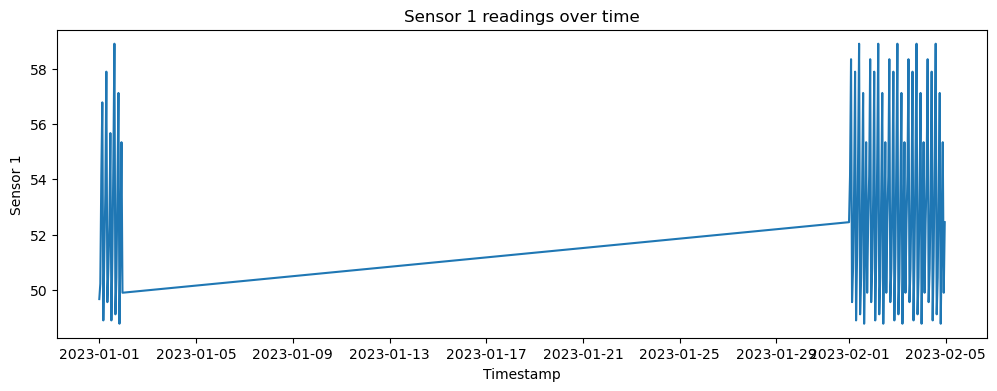

In [49]:
plt.figure(figsize=(12,4))
plt.plot(data['timestamp'], data['sensor_1'])
plt.title('Sensor 1 readings over time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor 1')
plt.show()

In [50]:
# 2. Preprocess data, handle missing values, and engineer relevant features

# Handle missing values by forward fill then backward fill

In [51]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

sensor_cols = [col for col in data.columns if col.startswith('sensor_')]

C:\Users\91837\AppData\Local\Temp\ipykernel_8728\1301556250.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\91837\AppData\Local\Temp\ipykernel_8728\1301556250.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [52]:
# Feature engineering: create lag features (previous 3 time steps) for each sensor

In [53]:
lag_steps = 3
for col in sensor_cols:
    for lag in range(1, lag_steps + 1):
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)


In [54]:
# Drop rows with NaN values created by lagging

In [55]:
data.dropna(inplace=True)


In [56]:
# Extract time-based features

In [57]:
data['hour'] = data['timestamp'].dt.hour
data['dayofweek'] = data['timestamp'].dt.dayofweek


In [58]:
# Define features and target

In [59]:
feature_cols = sensor_cols.copy()
for col in sensor_cols:
    for lag in range(1, lag_steps + 1):
        feature_cols.append(f'{col}_lag_{lag}')
feature_cols += ['hour', 'dayofweek']

X = data[feature_cols]
y = data['failure']


In [60]:
# Scale features

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# 3. Build a time-series forecasting model for equipment failures
# Here, simplified as classification with lag features

# Split data into train and test sets (80% train, 20% test) preserving time order

In [63]:
split_index = int(len(data) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [64]:
# Train logistic regression model

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [66]:
# 4. Evaluate model performance and interpret feature importance

In [67]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.83      0.91         6

    accuracy                           0.96        24
   macro avg       0.97      0.92      0.94        24
weighted avg       0.96      0.96      0.96        24



In [68]:
# Feature importance from logistic regression coefficients

In [69]:
coef = model.coef_[0]
feature_importance = pd.DataFrame({'feature': feature_cols, 'coefficient': coef})
feature_importance['abs_coef'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

print("\nTop features contributing to failure prediction:")
print(feature_importance.head(10))



Top features contributing to failure prediction:
          feature  coefficient  abs_coef
1        sensor_2     1.916964  1.916964
0        sensor_1     1.348151  1.348151
3  sensor_1_lag_2    -0.530336  0.530336
7  sensor_2_lag_3    -0.499245  0.499245
4  sensor_1_lag_3    -0.403832  0.403832
6  sensor_2_lag_2    -0.402106  0.402106
5  sensor_2_lag_1    -0.352718  0.352718
2  sensor_1_lag_1     0.278097  0.278097
9       dayofweek     0.147532  0.147532
8            hour     0.109779  0.109779


In [70]:
# Plot top 10 important features

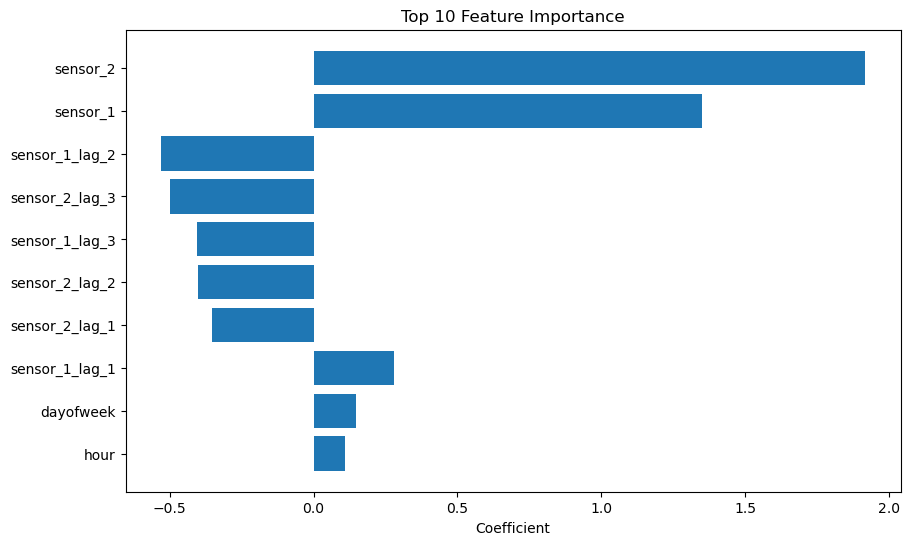

In [71]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'].head(10), feature_importance['coefficient'].head(10))
plt.xlabel('Coefficient')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [72]:
# 5. Provide recommendations for proactive maintenance scheduling

# Define risk threshold for failure probability

In [73]:
risk_threshold = 0.5

In [74]:
# Identify timestamps with predicted failure risk above threshold

In [75]:

high_risk_indices = np.where(y_proba > risk_threshold)[0]
high_risk_timestamps = data['timestamp'].iloc[split_index:].iloc[high_risk_indices]

print("\nRecommended maintenance timestamps (high failure risk):")
print(high_risk_timestamps.to_list())


Recommended maintenance timestamps (high failure risk):
[Timestamp('2023-02-04 06:00:00'), Timestamp('2023-02-04 10:00:00'), Timestamp('2023-02-04 14:00:00'), Timestamp('2023-02-04 18:00:00'), Timestamp('2023-02-04 21:00:00')]
